# Reconocimiento de Digitos usando Tensorflow

## Importamos la data

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

import matplotlib.pyplot as plt
import numpy as np
import random as ran

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


DATA MNIST
![alt text](images/mnista.png)

Primero, vamos a definir un par de funciones que asignarán la cantidad de data de entrenamiento y de prueba que cargaremos del conjunto de datos.

In [2]:
def TRAIN_SIZE(num):
    print ('Total de imagenes de entrenamiento en el conjunto de datos = ' + str(mnist.train.images.shape))
    print ('--------------------------------------------------')
    x_train = mnist.train.images[:num,:]
    print ('x_train ejemplos cargados = ' + str(x_train.shape))
    y_train = mnist.train.labels[:num,:]
    print ('y_train ejemplos cargados = ' + str(y_train.shape))
    print('')
    return x_train, y_train

def TEST_SIZE(num):
    print ('Total de imagenes de prueba en el conjunto de datos = ' + str(mnist.test.images.shape))
    print ('--------------------------------------------------')
    x_test = mnist.test.images[:num,:]
    print ('x_test ejemplos cargados = ' + str(x_test.shape))
    y_test = mnist.test.labels[:num,:]
    print ('y_test ejemplos cargados = ' + str(y_test.shape))
    return x_test, y_test

funciones simples para cambiar el tamaño y mostrar los datos:

In [3]:
def display_digit(num):
    print(y_train[num])
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([28,28])
    plt.title('Ejemplar: %d  Etiqueta: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

En primer lugar, definimos variables con el número de ejemplos de entrenamiento y prueba que queremos cargar. Por ahora, vamos a cargar todos los datos, pero vamos a cambiar este valor más adelante para ahorrar recursos:

In [4]:
x_train, y_train = TRAIN_SIZE(55000)

Total de imagenes de entrenamiento en el conjunto de datos = (55000, 784)
--------------------------------------------------
x_train ejemplos cargados = (55000, 784)
y_train ejemplos cargados = (55000, 10)



¿Entonces, qué significa esto? En nuestro conjunto de datos, hay 55.000 ejemplos de dígitos manuscritos de cero a nueve. Cada ejemplo es una imagen de 28x28 píxeles aplanada en una matriz con 784 valores que representan la intensidad de cada píxel. Los ejemplos deben ser convertidos de esta forma para que Tensorflow dé sentido a los dígitos linealmente. Esto muestra que en x_train hemos cargado 55.000 ejemplos cada uno con 784 píxeles. Nuestra variable x_train es una matriz de 55.000 filas y 784 columnas.

![alt text](images/number.gif)

Los datos y_train son las etiquetas asociadas para todos los ejemplos x_train. En lugar de almacenar la etiqueta como un entero, se almacena como una matriz binaria 1x10 con la que representa el dígito. Esto también se conoce como __one-hot-encoding__. 

![alt text](images/one-hot-encoding.png)

Ahora, vamos a sacar una imagen aleatoria utilizando una de nuestras funciones personalizadas que toma los datos convertidos, remodela, muestra el ejemplo, e imprime la etiqueta asociada.

[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


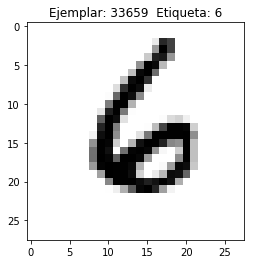

In [5]:
display_digit(ran.randint(0, x_train.shape[0]))

## Tensorflow

Tensorflow es el sistema de Machine Learning de Google de segunda generación (el de primera generación se llamaba DistBelief) preparado para redes neuronales, inteligencia artificial y Deep Learning.

Es usado en productos de Google como GMail, Sarch, reconocimiento de voz…

Google liberó en noviembre una implementación base como código open source (licencia Apache 2.0).

El core de Tensorflow está escrito en C++, ofrece librerías en Python y C++ y puede correr sobre CPU, GPU, en Linux y Mac, además de en Android e iOS.

Ahora es el momento de usar Tensorflow. Primero importamos la librería e definimos una sesión. Tensorflow, en cierto sentido, crea un grafo acíclico dirigido (diagrama de flujo) que luego se alimentará con datos y se ejecutará en una sesión:

In [6]:
import tensorflow as tf
sess = tf.Session()

In [7]:
x = tf.placeholder(tf.float32, shape=[None, 784])

In [8]:
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [9]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

Nuestro modelo se verá asi:

![alt text](images/neural.png)

Ahora vamos a definir __y__, que es nuestra función clasificadora. Este clasificador particular también se conoce como __regresión logística multinomial__. Hacemos nuestra predicción multiplicando cada dígito por nuestra matriz de pesos y luego añadimos el sesgo:

In [10]:
y = tf.nn.softmax(tf.matmul(x,W) + b)

In [11]:
print(y)

Tensor("Softmax:0", shape=(?, 10), dtype=float32)


Esto se debe a que aún no hemos alimentado a nuestro clasificador, ahora vamos a alimentarlo de 3 ejemplos y ver lo que predice. 
Para ejecutar primero debemos inicializar las variables en nuestra sesión:

In [12]:
x_train, y_train = TRAIN_SIZE(3)
sess.run(tf.global_variables_initializer())
print(sess.run(y, feed_dict={x: x_train}))

Total de imagenes de entrenamiento en el conjunto de datos = (55000, 784)
--------------------------------------------------
x_train ejemplos cargados = (3, 784)
y_train ejemplos cargados = (3, 10)

[[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]]


Aquí podemos ver nuestra predicción para nuestros primeros tres ejemplos de entrenamiento. Por supuesto, nuestro clasificador aún es algo malo, por lo que genera una probabilidad igual del 10% de nuestros ejemplos de entrenamiento para cada clase posible.

Pero, ¿Como hace tensorflow para calcular estas probabilidades?. 
Rpta: Nuestra red neuronal aprendió estas probabilidades calculando el valor de la __función softmax__ de nuestros resultados. Esta función toma un conjunto de valores y obliga a que estas sumen uno, de esta manerá nos dará probabilidades para cada valor.

Si seguimos ejecuntando veremos como cambian las probabilidades:

In [13]:
sess.run(tf.nn.softmax(tf.zeros([4])))
sess.run(tf.nn.softmax(tf.constant([0.1, 0.005, 2])))

array([ 0.11634309,  0.10579926,  0.7778576 ], dtype=float32)

Next, we will create our cross_entropy function, also known as a loss or cost function. It measures how good (or bad) of a job we are doing at classifying. The higher the cost, the higher the level of inaccuracy. It calculates accuracy by comparing the true values from y_train to the results of our prediction y for each example. The goal is to minimize your loss:

A continuación, crearemos nuestra función __cross_entropy__, también conocida como función de pérdida o costo. Mide cuán bueno (o malo) es el trabajo de nuestro clasificador. Cuanto mayor sea el costo, mayor será el nivel de imprecisión. Calcula la precisión comparando los valores reales de __y_train__ con los resultados de nuestra predicción __y__ para cada ejemplo. El objetivo es minimizar su pérdida:

In [14]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

Ahora vamos a comenzar a entrenar a nuestro clasificador. Para entrenar, debemos desarrollar valores apropiados para W yb que nos den la menor pérdida posible.

In [15]:
x_train, y_train = TRAIN_SIZE(10000)
x_test, y_test = TEST_SIZE(5000)
LEARNING_RATE = 0.1
TRAIN_STEPS = 2500

Total de imagenes de entrenamiento en el conjunto de datos = (55000, 784)
--------------------------------------------------
x_train ejemplos cargados = (10000, 784)
y_train ejemplos cargados = (10000, 10)

Total de imagenes de prueba en el conjunto de datos = (10000, 784)
--------------------------------------------------
x_test ejemplos cargados = (5000, 784)
y_test ejemplos cargados = (5000, 10)


Ahora podemos inicializar todas las variables para que puedan ser utilizadas por nuestro grafo:

In [16]:
init = tf.global_variables_initializer()
sess.run(init)

Luego necesitamos entrenar a nuestro clasificador usando la gradiente descendiente:

![alt text](images/gradient.gif)

In [17]:
training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Ahora, vamos a definir un bucle que repite __TRAIN_STEPS__ veces; Para cada bucle, ejecuta el entrenamiento, alimentando los valores de x_train y y_train usando __feed_dict__.

In [18]:
for i in range(TRAIN_STEPS+1):
    sess.run(training, feed_dict={x: x_train, y_: y_train})
    if i%100 == 0:
        print('Paso de entrenamiento:' + str(i) + '\t' +  'precisión =  ' + str(sess.run(accuracy, feed_dict={x: x_test, y_: y_test})) + '\t' +'Perdida = ' + str(sess.run(cross_entropy, {x: x_train, y_: y_train})))

Paso de entrenamiento:0	precisión =  0.608	Perdida = 2.19374
Paso de entrenamiento:100	precisión =  0.8286	Perdida = 0.608355
Paso de entrenamiento:200	precisión =  0.8484	Perdida = 0.488833
Paso de entrenamiento:300	precisión =  0.8584	Perdida = 0.438496
Paso de entrenamiento:400	precisión =  0.8672	Perdida = 0.408899
Paso de entrenamiento:500	precisión =  0.8702	Perdida = 0.388668
Paso de entrenamiento:600	precisión =  0.8712	Perdida = 0.373595
Paso de entrenamiento:700	precisión =  0.8732	Perdida = 0.36172
Paso de entrenamiento:800	precisión =  0.8764	Perdida = 0.351994
Paso de entrenamiento:900	precisión =  0.8776	Perdida = 0.343797
Paso de entrenamiento:1000	precisión =  0.8804	Perdida = 0.336738
Paso de entrenamiento:1100	precisión =  0.8802	Perdida = 0.330553
Paso de entrenamiento:1200	precisión =  0.8808	Perdida = 0.325061
Paso de entrenamiento:1300	precisión =  0.881	Perdida = 0.320129
Paso de entrenamiento:1400	precisión =  0.8818	Perdida = 0.315659
Paso de entrenamiento:1500

Ahora que hemos calculado los pesos de nuestra red neuronal vamos a graficarlos y ver qué es lo que esta pasando:

In [19]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = sess.run(W)[:,i]
    plt.title(i)
    plt.imshow(weight.reshape([28,28]), cmap=plt.get_cmap('seismic'))
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

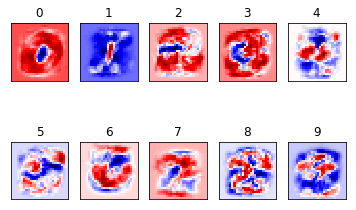

In [20]:
plt.show()

Esta es una visualización de nuestros pesos de 0-9. Este es el aspecto más importante de nuestro clasificador. Nuestro clasificador hace su predicción comparando cuan similar es el digito a los colores rojo y azul. 

Por lo tanto, ahora que tenemos nuestro cheat sheet, vamos a cargar un ejemplo y aplicar nuestro clasificador a ese ejemplo:

Total de imagenes de entrenamiento en el conjunto de datos = (55000, 784)
--------------------------------------------------
x_train ejemplos cargados = (1, 784)
y_train ejemplos cargados = (1, 10)

[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


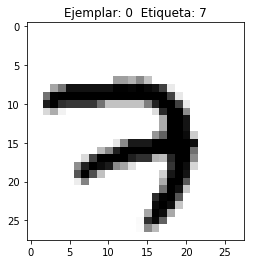

In [21]:
x_train, y_train = TRAIN_SIZE(1)
display_digit(0)

tomamos esta muestra para ver si nuestro clasificador funciona

In [22]:
answer = sess.run(y, feed_dict={x: x_train})
print(answer)

[[  3.68221990e-05   6.23397455e-06   3.18521947e-01   1.33946724e-02
    7.76696950e-04   4.32607476e-06   2.70144610e-05   6.43067062e-01
    5.93539700e-03   1.82298422e-02]]


WTF??? Qué es esto? D:

Esto nos dá una matriz de (1x10) donde cada columna contiene una probabilidad.
Pero esto no es muy útil para nosotros. Así, utilizamos la función argmax para devolver la posición del valor más alto y eso nos da nuestra predicción.

In [23]:
answer.argmax()

7

Ahora, vamos a tomar este ejemplo para crear una función para hacer predicciones en un dígito aleatorio en este conjunto de datos:

In [24]:
def display_compare(num):
    # con esto cargamos nuestro digito de entrenamiento
    x_train = mnist.train.images[num,:].reshape(1,784)
    y_train = mnist.train.labels[num,:]
    # Esto nos da su etiqueta como entero
    label = y_train.argmax()
    # Esto nos da la predicción como entero
    prediction = sess.run(y, feed_dict={x: x_train}).argmax()
    plt.title('Prediccion: %d Etiqueta: %d' % (prediction, label))
    plt.imshow(x_train.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
    plt.show()

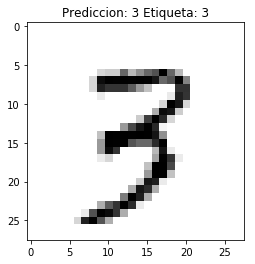

In [25]:
display_compare(ran.randint(0, 55000))

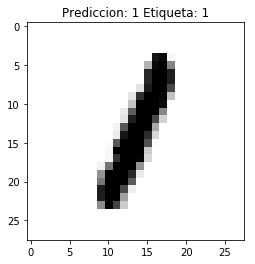

In [26]:
display_compare(ran.randint(0, 55000))

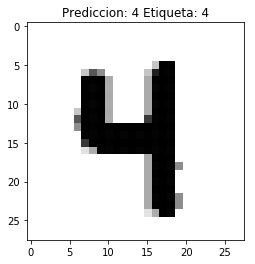

In [30]:
display_compare(ran.randint(0, 55000))

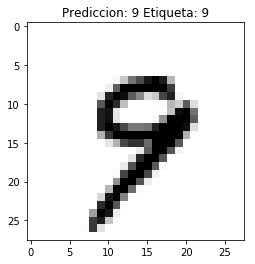

In [35]:
display_compare(ran.randint(0, 55000))

In [34]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = 'styles/StyleCursoPython.css'
HTML(open(css_file, "r").read())